# <center>M3 T01: Exercicis de Training i Test Sets

In [1]:
# Importo algunas de las librerías que voy a utilizar:
import pandas
import matplotlib.pyplot as plt
import seaborn as sbrn

# Especifico que no se oculten columnas:
pandas.set_option('display.max_columns', None)

## Exercici 1
Parteix el conjunt de dades **DelayedFlights.csv** en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.  
**NOTA**: Seria hacer un estudio básico y comparativo de cada dataset generado (ver distribuciones, medias, etc. para ver si se asemejan o no). También en este punto puedes determinar cuál puede ser tu variable objetivo. Aunque no se pide obtener una variable a partir de las otras si conviene ver cuáles podrían ser susceptibles a ser variable objetivo.

In [2]:
# Almaceno en un dataframe el csv:
flights = pandas.read_csv('./input/DelayedFlights.csv')

# Elimino la columna 'Unnamed: 0', correspondiente a los índices originales:
del(flights['Unnamed: 0'])

# Imprimo el dataframe:
flights

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1936753,2008,12,13,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,2008,12,13,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,2008,12,13,6,1007.0,847,1149.0,1010,DL,1631,N909DA,162.0,143.0,122.0,99.0,80.0,ATL,IAH,689,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,2008,12,13,6,1251.0,1240,1446.0,1437,DL,1639,N646DL,115.0,117.0,89.0,9.0,11.0,IAD,ATL,533,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [3]:
# Compruebo los tipos de datos de las columnas:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 29 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Year               int64  
 1   Month              int64  
 2   DayofMonth         int64  
 3   DayOfWeek          int64  
 4   DepTime            float64
 5   CRSDepTime         int64  
 6   ArrTime            float64
 7   CRSArrTime         int64  
 8   UniqueCarrier      object 
 9   FlightNum          int64  
 10  TailNum            object 
 11  ActualElapsedTime  float64
 12  CRSElapsedTime     float64
 13  AirTime            float64
 14  ArrDelay           float64
 15  DepDelay           float64
 16  Origin             object 
 17  Dest               object 
 18  Distance           int64  
 19  TaxiIn             float64
 20  TaxiOut            float64
 21  Cancelled          int64  
 22  CancellationCode   object 
 23  Diverted           int64  
 24  CarrierDelay       float64
 25  WeatherDelay      

Lo primero que creo que debo hacer es **eliminar los registros con valores null**, porque ya he visto en ejercicios anteriores con este dataset que afectan a columnas importantes.

In [4]:
# Elimino todos los registros con valores null:
flights.dropna(axis=0, how='any', inplace=True)

# Reseteo los índices:
flights.reset_index(drop=True, inplace=True)

In [5]:
# Importo la librería necesaria para dividir el dataframe:
from sklearn.model_selection import train_test_split

In [6]:
# Como aun no hay que decidir la variable objetivo, divido el dataframe en 2 partes, en lugar de en 4
#   (como se haría en un caso real en el que fuéramos a aplicar un modelo de Machine Learning):
train, test = train_test_split(flights, test_size=0.2, random_state=1)

# Imprimo la cantidad de filas y colmnas de cada dataset:
print(train.shape, test.shape)

(997988, 29) (249498, 29)


In [7]:
# Imprimo un análisis estadístico del dataset "train":
train.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,997988.0,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.00,997988.0,997988.0,997988.00,997988.00,997988.00,997988.00,997988.00
mean,2008.0,6.06,15.73,3.98,1558.65,1487.62,1616.41,1652.44,2277.08,135.40,131.78,107.43,63.30,59.69,741.68,7.30,20.67,0.0,0.0,19.19,3.70,15.03,0.09,25.29
std,0.0,3.51,8.79,1.99,454.32,421.33,584.05,461.63,1997.40,72.27,69.51,68.15,60.83,59.93,559.15,6.03,16.70,0.0,0.0,43.62,21.57,33.78,2.05,42.04
min,2008.0,1.00,1.00,1.00,1.00,0.00,1.00,0.00,1.00,14.00,1.00,0.00,15.00,6.00,24.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1232.00,1150.00,1325.00,1340.00,637.00,83.00,80.00,58.00,26.00,24.00,334.00,4.00,11.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1618.00,1528.00,1736.00,1722.00,1591.00,118.00,115.00,90.00,43.00,41.00,595.00,6.00,16.00,0.0,0.0,2.00,0.00,2.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1924.00,1830.00,2048.00,2022.00,3677.00,167.00,161.00,136.00,79.00,75.00,972.00,8.00,24.00,0.0,0.0,21.00,0.00,15.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,9740.00,1114.00,660.00,1091.00,2461.00,2467.00,4962.00,240.00,422.00,0.0,0.0,2436.00,1352.00,1357.00,392.00,1316.00


In [8]:
# Imprimo un análisis estadístico del dataset "test":
test.describe().round(2)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,249498.0,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.00,249498.0,249498.0,249498.00,249498.00,249498.00,249498.00,249498.00
mean,2008.0,6.07,15.72,3.97,1559.57,1489.25,1618.09,1652.52,2274.29,135.30,131.70,107.37,63.24,59.64,741.21,7.30,20.62,0.0,0.0,19.13,3.70,14.98,0.08,25.34
std,0.0,3.51,8.79,1.99,454.35,420.55,583.50,462.18,1998.12,72.38,69.63,68.26,60.43,59.63,560.20,6.05,16.60,0.0,0.0,43.25,21.18,34.03,1.89,42.11
min,2008.0,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,15.00,-21.00,0.00,15.00,6.00,11.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
25%,2008.0,3.00,8.00,2.00,1233.00,1154.00,1327.00,1340.00,635.00,82.00,80.00,58.00,26.00,24.00,334.00,4.00,11.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00
50%,2008.0,6.00,16.00,4.00,1619.00,1530.00,1738.00,1724.00,1585.00,118.00,115.00,89.00,43.00,41.00,594.00,6.00,16.00,0.0,0.0,2.00,0.00,1.00,0.00,8.00
75%,2008.0,9.00,23.00,6.00,1924.00,1830.00,2048.00,2021.00,3674.00,167.00,161.00,136.00,79.00,75.00,967.00,8.00,24.00,0.0,0.0,21.00,0.00,14.00,0.00,33.00
max,2008.0,12.00,31.00,7.00,2400.00,2359.00,2400.00,2359.00,9741.00,750.00,660.00,654.00,1655.00,1597.00,4962.00,225.00,376.00,0.0,0.0,1510.00,1080.00,1195.00,284.00,1303.00


> De los análisis estadísticos, se desprende que el dataframe **test** es lo suficientemente parecido al dataframe **train** como para poder ser utilizado para testear un modelo de Machine Learning.  
Por ejemplo, las variables **DepTime** y **ArrTime** (que considero muy importantes) tienen prácticamente los mismos valores mínimos, máximos y medios, y la desviación estándar también es muy similar en ambos dataframes.

Imprimo un gráfico de **distribución** de los 2 dataframes (de las variables **ArrTime** y **DepTime**), y compruebo que el resultado también es muy similar en ambos.

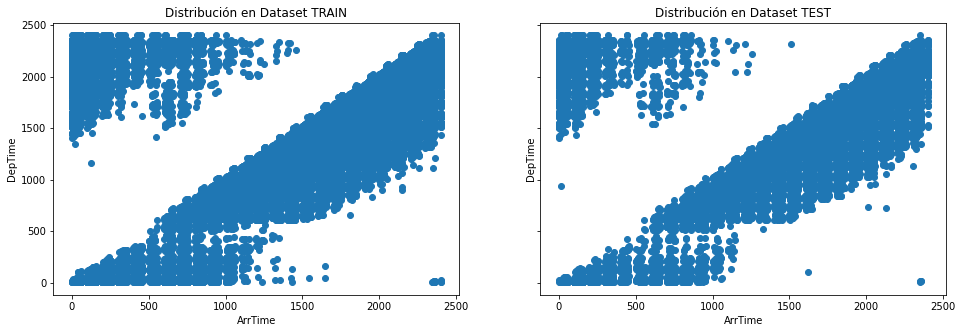

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True, squeeze=False)

ax[0,0].scatter(x='ArrTime', y='DepTime', data=train)
ax[0,1].scatter(x='ArrTime', y='DepTime', data=test)

ax[0,0].set_title("Distribución en Dataset TRAIN")
ax[0,0].set_xlabel("ArrTime")
ax[0,0].set_ylabel("DepTime")
ax[0,1].set_title("Distribución en Dataset TEST")
ax[0,1].set_xlabel("ArrTime")
ax[0,1].set_ylabel("DepTime")
plt.show()

Imprimo un gráfico de **distribución** de los 2 dataframes (de las variables **ArrDelay** y **DepDelay**), y compruebo que en este caso hay diferencias importantes en los valores máximos.  
En un caso real, supongo que habría que "retocar" manualmente estos valores, para que se parezcan más en los sets de train y test.

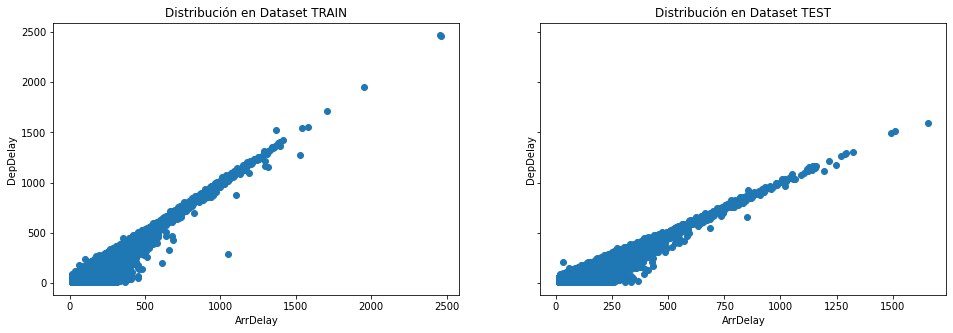

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16,5), sharey=True, squeeze=False)

ax[0,0].scatter(x='ArrDelay', y='DepDelay', data=train)
ax[0,1].scatter(x='ArrDelay', y='DepDelay', data=test)

ax[0,0].set_title("Distribución en Dataset TRAIN")
ax[0,0].set_xlabel("ArrDelay")
ax[0,0].set_ylabel("DepDelay")
ax[0,1].set_title("Distribución en Dataset TEST")
ax[0,1].set_xlabel("ArrDelay")
ax[0,1].set_ylabel("DepDelay")
plt.show()

> Si tuviera que decidir una variable objetivo, no sería ninguna de las que contiene el dataframe original.  
Crearía una columna que especificara si el vuelo se ha retrado o no (con valores **True** y **False**), o una que especificara el **tiempo de retraso** (que podría ser negativo), y utilizaría una de ellas como variable objetivo.

## Exercici 2
Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis, etc).  
**NOTA**: Basta con estandarizar las variables numéricas (utilizando las herramientas que te facilita scikitlearn) y crear variables dummies.

> **NOTA**: Haré las transformaciones directamente sobre el dataframe **flights**, que luego habría que volver a dividir mediante **train_test_split**.

Aunque no es una transformación propiamente dicha, creo que sería conveniente almacenar la **fecha** en una única columna, de tipo **datetime**, y eliminar las 3 columnas que hacen referencia a la fecha en el dataframe original.

In [11]:
# Renombro la columna 'DayofMonth' por 'Day', porque lo requiere la sintaxis del comando siguiente:
flights.rename(columns={'DayofMonth':'Day'}, inplace=True)

# Creo la columna 'Date', con los valores de las columnas 'Year', 'Month' y 'Day':
flights['Date'] = pandas.to_datetime(flights[['Year','Month','Day']])

# Elimino las columnas 'Year',' Month' y 'Day' (dejo la columna DayOfWeek' porque puede ser un dato útil):
flights.drop(['Year','Month','Day'], axis=1, inplace=True)

# Imprimo la nueva versión del dataframe:
flights

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0,2008-01-03
1,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0,2008-01-03
2,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0,2008-01-03
3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0,2008-01-03
4,4,1323.0,1255,1526.0,1510,WN,4,N674AA,123.0,135.0,110.0,16.0,28.0,IND,TPA,838,4.0,9.0,0,N,0,0.0,0.0,0.0,0.0,16.0,2008-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,6,921.0,830,1112.0,1008,DL,1616,N907DE,111.0,98.0,82.0,64.0,51.0,ATL,PBI,545,8.0,21.0,0,N,0,51.0,0.0,13.0,0.0,0.0,2008-12-13
1247482,6,1552.0,1520,1735.0,1718,DL,1620,N905DE,43.0,58.0,27.0,17.0,32.0,HSV,ATL,151,9.0,7.0,0,N,0,0.0,0.0,0.0,0.0,17.0,2008-12-13
1247483,6,1250.0,1220,1617.0,1552,DL,1621,N938DL,147.0,152.0,120.0,25.0,30.0,MSP,ATL,906,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0,2008-12-13
1247484,6,657.0,600,904.0,749,DL,1631,N3743H,127.0,109.0,78.0,75.0,57.0,RIC,ATL,481,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0,2008-12-13


En principio, no veo que en este ejemplo sea necesario transformar las columnas numéricas, porque la mayoría especifican valores temporales, y con el mismo formato, pero supongo que se trata de ejemplificar algún tipo de transformación.  
Una opción es escalar los valores numéricos con la función **StandardScaler**.

In [12]:
# Importo la función "StandardScaler":
from sklearn.preprocessing import StandardScaler

# Uso la función "fit_transform" para escalar las variables (solo las numéricas):
flights_num_enc = StandardScaler().fit_transform(flights.select_dtypes(include=['int64','float64']))

# Imprimo los valores estandarizados:
flights_num_enc

array([[ 0.00999246,  0.59465183,  0.63405707, ..., -0.44399241,
        -0.04456253,  0.15939913],
       [ 0.00999246,  0.83236459,  0.81212905, ..., -0.44399241,
        -0.04456253,  0.516076  ],
       [ 0.00999246,  0.18745868,  0.05235528, ..., -0.44399241,
        -0.04456253,  1.11053744],
       ...,
       [ 1.01336944, -0.67975267, -0.6361897 , ..., -0.44399241,
        -0.04456253, -0.07838545],
       [ 1.01336944, -1.9849718 , -2.10825138, ...,  0.08803153,
        -0.04456253, -0.60151152],
       [ 1.01336944, -1.21460638, -1.521801  , ...,  0.11758842,
        -0.04456253,  1.27698665]])

In [13]:
# El resultado no es un dataframe, sino un array numpy, pero podemos usarlo para crear un dataframe
#   (obteniendo los nombres de las columnas con el atributo "columns" de pandas):
flights_num_enc_df = pandas.DataFrame(flights_num_enc, columns=flights.select_dtypes(include=['int64','float64']).columns)

flights_num_enc_df

,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0.009992,0.594652,0.634057,0.586105,0.590254,0.822746,-0.627665,-0.600645,-0.446213,-0.482127,-0.428891,-0.405079,-0.712260,-0.639115,0.0,0.0,-0.394510,-0.172317,-0.443992,-0.044563,0.159399
1,0.009992,0.832365,0.812129,0.719680,0.622740,-0.884849,1.447129,1.700454,1.798028,-0.103550,0.122314,1.518534,-0.712260,-0.818973,0.0,0.0,-0.210797,-0.172317,-0.443992,-0.044563,0.516076
2,0.009992,0.187459,0.052355,0.390880,0.157107,-0.472342,-0.198874,0.046539,-0.006165,0.275028,0.573300,0.154485,-0.215014,-0.759021,0.0,0.0,-0.256726,-0.172317,-0.443992,-0.044563,1.110537
3,0.009992,-0.235142,-0.149460,0.039818,-0.059466,-0.801747,1.281145,1.556635,1.548668,-0.794865,-0.545814,1.336184,-0.049266,-0.759021,0.0,0.0,-0.371546,-0.172317,-0.443992,-0.044563,-0.316170
4,0.009992,-0.519076,-0.553089,-0.155408,-0.308526,-1.137659,-0.171210,0.046539,0.037839,-0.778405,-0.529111,0.172362,-0.546511,-0.699068,0.0,0.0,-0.440438,-0.172317,-0.443992,-0.044563,-0.221056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,1.013369,-1.403896,-1.562164,-0.864383,-1.395724,-0.330669,-0.337194,-0.485590,-0.372871,0.011669,-0.144937,-0.351447,0.116483,0.020364,0.0,0.0,0.730731,-0.172317,-0.059753,-0.044563,-0.601512
1247482,1.013369,-0.015037,0.076098,0.202505,0.141947,-0.328666,-1.277767,-1.060865,-1.179625,-0.761945,-0.462298,-1.055818,0.282231,-0.818973,0.0,0.0,-0.440438,-0.172317,-0.443992,-0.044563,-0.197278
1247483,1.013369,-0.679753,-0.636190,0.000430,-0.217565,-0.328166,0.160757,0.291031,0.184522,-0.630266,-0.495704,0.293929,0.282231,-0.159494,0.0,0.0,-0.371546,-0.172317,-0.443992,-0.044563,-0.078385
1247484,1.013369,-1.984972,-2.108251,-1.220583,-1.956650,-0.323159,-0.115883,-0.327390,-0.431544,0.192728,-0.044718,-0.465862,1.276722,0.799748,0.0,0.0,-0.440438,2.479891,0.088032,-0.044563,-0.601512


> A primera vista, dudo de que este escalado produzca buenos resultados al aplicar un modelo de Machine Learning.  
Como he dicho antes, creo que en este caso no era necesario ni recomendable, pero ahi queda la demostración del proceso.

Para generar columnas **dummies** en base a las columnas categóricas, una opción es usar la función **OneHotEncoder**, de la librería **Scikit-Learn**.<br>
Lo haré sobre la columna **UniqueCarrier**, porque las demás columnas categóricas incluyen demasiados valores (sobretodo 'TailNum', que tiene más de 5000 valores únicos).

In [14]:
# Importo la función "OneHotEncoder":
from sklearn.preprocessing import OneHotEncoder

# Almaceno la función en un objeto:
encoder = OneHotEncoder(sparse=False)

# Utilizo la función "fit_transform" para codificar los valores de la variable 'UniqueCarrier':
cat_encoded = encoder.fit_transform(flights['UniqueCarrier'].to_numpy().reshape(-1, 1))

# Imprimo los valores codificados:
cat_encoded

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
# El resultado no es un dataframe, sino un array numpy, pero podemos usarlo para crear un dataframe
#   (obteniendo los nombres de las columnas con la función "get_feature_names_out" del codificador):
flights_cat_enc_df = pandas.DataFrame(cat_encoded, columns=encoder.get_feature_names_out())

flights_cat_enc_df

,x0_9E,x0_AA,x0_AQ,x0_AS,x0_B6,x0_CO,x0_DL,x0_EV,x0_F9,x0_FL,x0_HA,x0_MQ,x0_NW,x0_OH,x0_OO,x0_UA,x0_US,x0_WN,x0_XE,x0_YV
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247482,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247483,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1247484,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


También podemos generar columnas **dummies** en base a columnas categóricas con la función **get_dummies** de pandas, de forma más sencilla, de hecho.

In [16]:
# Utilizo la función "get_dummies" para codificar los valores de la variable 'UniqueCarrier':
flights_dummies = pandas.get_dummies(flights['UniqueCarrier'])

# Imprimo los valores codificados, que en este caso, ya están en un dataframe:
flights_dummies

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247481,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247482,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247483,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1247484,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


## Exercici 3
Resumeix les noves columnes generades de manera estadística i gràfica.

In [17]:
# Imprimo un análisis estadístico del dataframe "flights_dummies":
flights_dummies.describe().round()

,9E,AA,AQ,AS,B6,CO,DL,EV,F9,FL,HA,MQ,NW,OH,OO,UA,US,WN,XE,YV
count,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0,1247486.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


Mostrar estos valores en una gráfica no es sencillo a primera vista, pero podemos hacerlo con la función **melt** de pandas.

In [18]:
# Utilizo la función "melt" para generar un nuevo dataframe, en base al dataframe "flights_dummies"
#   (las categorías se almacenan en la columna "variable", y sus valores en la columna "value"):
melt_df = pandas.melt(flights_dummies)

melt_df

,variable,value
0,9E,0
1,9E,0
2,9E,0
3,9E,0
4,9E,0
...,...,...
24949715,YV,0
24949716,YV,0
24949717,YV,0
24949718,YV,0


In [19]:
# Reduzco el dataframe a los registros que tienen valor "1" en la columna "value", que son los que nos interesan:
melt_df = melt_df.query("value == 1")

melt_df

,variable,value
91027,9E,1
91028,9E,1
91029,9E,1
91030,9E,1
91031,9E,1
...,...,...
24844695,YV,1
24844696,YV,1
24844697,YV,1
24844698,YV,1


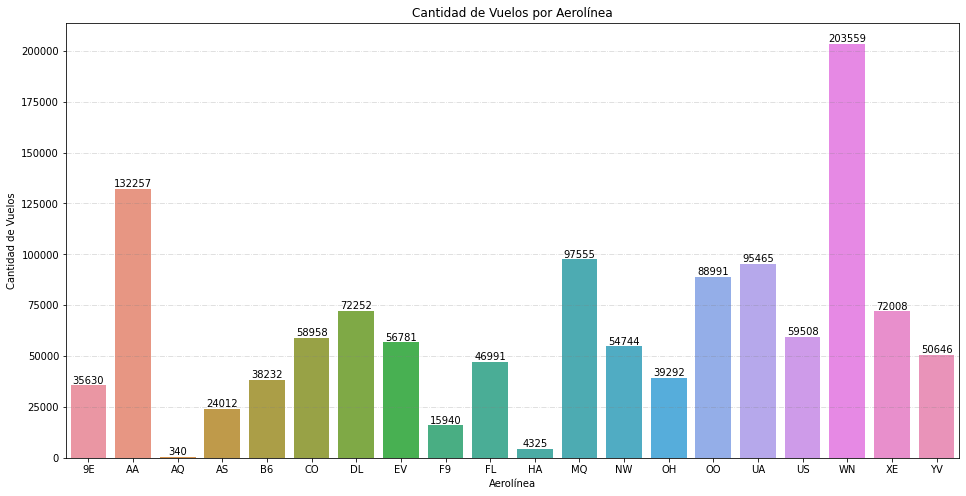

In [20]:
# Creo un "countplot", basado en el dataframe "melt_df":
plt.figure(figsize = (16, 8))

ax = sbrn.countplot(x='variable', data=melt_df)

for container in ax.containers:
    ax.bar_label(container)
    
plt.title("Cantidad de Vuelos por Aerolínea")
plt.xlabel("Aerolínea")
plt.ylabel("Cantidad de Vuelos")
ax.grid(axis='y', color='gray', linestyle='dashdot', alpha=0.3)
plt.show()

---